In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv("Train_pjb2QcD.csv")
test_df = pd.read_csv("Test_wyCirpO.csv")
train_df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [3]:
train_df.shape

(9527, 23)

In [4]:
train_df.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [5]:
train_df.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [6]:
train_df[['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']]=train_df.loc[:,['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']].apply(pd.to_datetime,errors='ignore')
test_df[['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']]=test_df.loc[:,['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']].apply(pd.to_datetime,errors='ignore')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
ID                             9527 non-null object
Office_PIN                     9527 non-null int64
Application_Receipt_Date       9527 non-null datetime64[ns]
Applicant_City_PIN             9430 non-null float64
Applicant_Gender               9460 non-null object
Applicant_BirthDate            9454 non-null datetime64[ns]
Applicant_Marital_Status       9454 non-null object
Applicant_Occupation           8306 non-null object
Applicant_Qualification        9441 non-null object
Manager_DOJ                    8844 non-null datetime64[ns]
Manager_Joining_Designation    8844 non-null object
Manager_Current_Designation    8844 non-null object
Manager_Grade                  8844 non-null float64
Manager_Status                 8844 non-null object
Manager_Gender                 8844 non-null object
Manager_DoB                    8844 non-null datetime64[ns]
Manager_Num_Application     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x081A2890>,
      dtype=object)

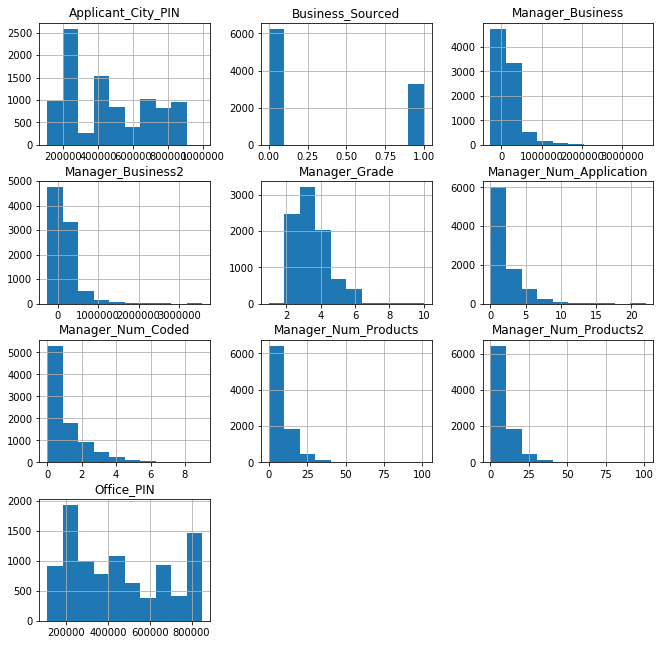

In [8]:
train_df[train_df.dtypes[(train_df.dtypes=="float64")|(train_df.dtypes=="int64")].index.values].hist(figsize=(11,11))

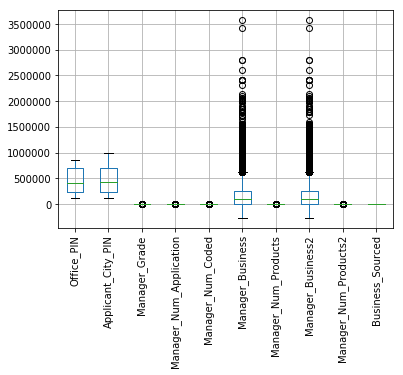

In [9]:
train_df.boxplot(rot=90)

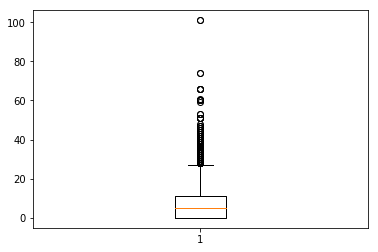

In [10]:
plt.boxplot(train_df['Manager_Num_Products'].dropna())
train_df = train_df.loc[train_df.Manager_Num_Products<25,:]

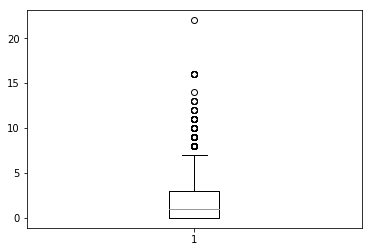

In [11]:
plt.boxplot(train_df['Manager_Num_Application'].dropna())
train_df = train_df.loc[train_df.Manager_Num_Application<7,:]

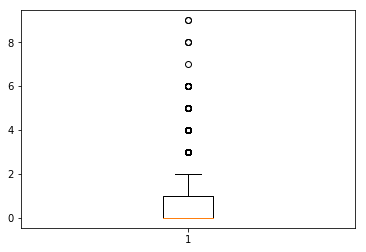

In [12]:
plt.boxplot(train_df['Manager_Num_Coded'].dropna())
train_df = train_df.loc[train_df.Manager_Num_Coded<2,:]

{'boxes': [<matplotlib.lines.Line2D at 0x8d104d0>],
 'caps': [<matplotlib.lines.Line2D at 0x8d10c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x8d17410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8d10fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8d10750>,
  <matplotlib.lines.Line2D at 0x8d109d0>]}

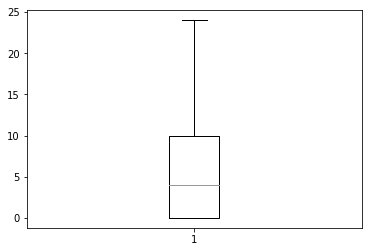

In [13]:
plt.boxplot(train_df['Manager_Num_Products2'].dropna())

In [14]:
train_df.corr()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
Office_PIN,1.000000,0.975765,-0.086000,0.046801,0.045150,0.078373,0.098372,0.077295,0.097434,0.043881
Applicant_City_PIN,0.975765,1.000000,-0.100366,0.042005,0.044108,0.077670,0.100246,0.076342,0.099302,0.044240
Manager_Grade,-0.086000,-0.100366,1.000000,-0.003737,-0.007430,0.296766,0.178202,0.296728,0.177811,0.040953
Manager_Num_Application,0.046801,0.042005,-0.003737,1.000000,0.321831,0.037827,0.041536,0.039674,0.041501,-0.052531
Manager_Num_Coded,0.045150,0.044108,-0.007430,0.321831,1.000000,0.163493,0.200170,0.166599,0.200101,-0.007029
Manager_Business,0.078373,0.077670,0.296766,0.037827,0.163493,1.000000,0.735981,0.992042,0.728982,0.002497
Manager_Num_Products,0.098372,0.100246,0.178202,0.041536,0.200170,0.735981,1.000000,0.741900,0.998757,-0.041638
Manager_Business2,0.077295,0.076342,0.296728,0.039674,0.166599,0.992042,0.741900,1.000000,0.740241,0.002600
Manager_Num_Products2,0.097434,0.099302,0.177811,0.041501,0.200101,0.728982,0.998757,0.740241,1.000000,-0.041697
Business_Sourced,0.043881,0.044240,0.040953,-0.052531,-0.007029,0.002497,-0.041638,0.002600,-0.041697,1.000000


In [15]:
pd.crosstab(index=train_df["Applicant_Gender"],columns=train_df["Applicant_Marital_Status"])

Applicant_Marital_Status,D,M,S,W
Applicant_Gender,,,,
F,1,1030,556,4
M,2,3282,1756,1


In [16]:
pd.crosstab(index=train_df["Applicant_Qualification"],columns=train_df["Applicant_Gender"])

Applicant_Gender,F,M
Applicant_Qualification,,
Associate / Fellow of Institute of Chartered Accountans of India,0,2
Associate/Fellow of Acturial Society of India,0,1
Associate/Fellow of Institute of Company Secretories of India,0,1
Associate/Fellow of Insurance Institute of India,0,1
Class X,14,131
Class XII,950,3169
Graduate,596,1614
Masters of Business Administration,10,49
Others,19,64


In [17]:
pd.crosstab(index=train_df["Applicant_Qualification"],columns=train_df["Applicant_Occupation"])

Applicant_Occupation,Business,Others,Salaried,Self Employed,Student
Applicant_Qualification,,,,,
Associate / Fellow of Institute of Chartered Accountans of India,1,0,0,0,1
Associate/Fellow of Acturial Society of India,0,0,1,0,0
Associate/Fellow of Institute of Company Secretories of India,0,0,1,0,0
Associate/Fellow of Insurance Institute of India,0,0,1,0,0
Class X,56,25,53,4,1
Class XII,1169,893,1760,50,62
Graduate,430,355,810,48,7
Masters of Business Administration,8,9,29,0,0
Others,10,28,33,2,0


In [18]:
pd.crosstab(index=train_df["Manager_Grade"],columns=train_df["Business_Sourced"])

Business_Sourced,0,1
Manager_Grade,,
1.0,5,1
2.0,1290,607
3.0,1599,818
4.0,1054,546
5.0,276,170
6.0,162,108
7.0,10,8
8.0,2,1
9.0,3,3


In [19]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Status"],columns=train_df["Business_Sourced"]))

(44.1177672033956,
 3.092016163041892e-11,
 1,
 array([[2391.55428914, 1229.44571086],
        [2012.44571086, 1034.55428914]]))

In [20]:
chi2_contingency(pd.crosstab(index=train_df["Applicant_Gender"],columns=train_df["Manager_Gender"]))

(206.4830728807791,
 8.038774364622603e-47,
 1,
 array([[ 205.06813386, 1387.93186614],
        [ 648.93186614, 4392.06813386]]))

In [21]:
chi2_contingency(pd.crosstab(index=train_df["Applicant_Marital_Status"],columns=train_df["Business_Sourced"]))

(3.2306120989136415,
 0.35741749155299135,
 3,
 array([[1.97587455e+00, 1.02412545e+00],
        [2.83999035e+03, 1.47200965e+03],
        [1.52274065e+03, 7.89259349e+02],
        [3.29312425e+00, 1.70687575e+00]]))

In [22]:
chi2_contingency(pd.crosstab(index=train_df["Applicant_Qualification"],columns=train_df["Business_Sourced"]))

(27.83551913391652,
 0.0010161288005187796,
 9,
 array([[1.31632191e+00, 6.83678091e-01],
        [6.58160954e-01, 3.41839046e-01],
        [6.58160954e-01, 3.41839046e-01],
        [6.58160954e-01, 3.41839046e-01],
        [9.54333384e+01, 4.95666616e+01],
        [2.71096497e+03, 1.40803503e+03],
        [1.45519387e+03, 7.55806130e+02],
        [3.88314963e+01, 2.01685037e+01],
        [5.46273592e+01, 2.83726408e+01],
        [6.58160954e-01, 3.41839046e-01]]))

In [23]:
chi2_contingency(pd.crosstab(index=train_df["Applicant_Occupation"],columns=train_df["Business_Sourced"]))

(62.73821987027176,
 7.703700861440026e-13,
 4,
 array([[1096.82769231,  577.17230769],
        [ 858.98512821,  452.01487179],
        [1762.52478632,  927.47521368],
        [  68.14222222,   35.85777778],
        [  46.52017094,   24.47982906]]))

In [24]:
pd.crosstab(index=train_df["Applicant_Occupation"],columns=train_df["Business_Sourced"])

Business_Sourced,0,1
Applicant_Occupation,,
Business,1108,566
Others,829,482
Salaried,1754,936
Self Employed,104,0
Student,38,33


In [25]:
chi2_contingency(pd.crosstab(index=train_df["Applicant_Occupation"],columns=train_df["Business_Sourced"]).drop(index='Others'))

(59.37602649325242,
 7.989933950576019e-13,
 3,
 array([[1107.88631857,  566.11368143],
        [1780.29521921,  909.70478079],
        [  68.82925755,   35.17074245],
        [  46.98920467,   24.01079533]]))

In [26]:
pd.crosstab(index=train_df["Applicant_Occupation"],columns=train_df["Business_Sourced"]).drop(index='Others')


Business_Sourced,0,1
Applicant_Occupation,,
Business,1108,566
Salaried,1754,936
Self Employed,104,0
Student,38,33


In [27]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Joining_Designation"],columns=train_df["Business_Sourced"]))

(35.54933949854099,
 8.815709252414269e-06,
 7,
 array([[2.20728374e+03, 1.13471626e+03],
        [1.44114097e+03, 7.40859028e+02],
        [6.27444511e+02, 3.22555489e+02],
        [8.85026995e+01, 4.54973005e+01],
        [6.60467906e-01, 3.39532094e-01],
        [3.96280744e+00, 2.03719256e+00],
        [1.32093581e+00, 6.79064187e-01],
        [3.36838632e+01, 1.73161368e+01]]))

In [28]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Status"],columns=train_df["Business_Sourced"]))

(44.1177672033956,
 3.092016163041892e-11,
 1,
 array([[2391.55428914, 1229.44571086],
        [2012.44571086, 1034.55428914]]))

In [29]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Status"],columns=train_df["Manager_Gender"]))

(21.025072381825993,
 4.533122580907834e-06,
 1,
 array([[ 467.01559688, 3153.98440312],
        [ 392.98440312, 2654.01559688]]))

In [30]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Gender"],columns=train_df["Business_Sourced"]))

(2.0379526554021927,
 0.15341601162173124,
 1,
 array([[ 568.00239952,  291.99760048],
        [3835.99760048, 1972.00239952]]))

In [31]:
chi2_contingency(pd.crosstab(index=train_df["Manager_Status"],columns=train_df["Applicant_Gender"]))

(6.132137344667205,
 0.013274629835875075,
 1,
 array([[ 865.41634007, 2738.58365993],
        [ 727.58365993, 2302.41634007]]))

In [32]:
train_df['Applicant_City_PIN']=train_df['Applicant_City_PIN'].fillna(method='ffill')
test_df['Applicant_City_PIN'] = test_df['Applicant_City_PIN'].fillna(method='ffill')

In [33]:
train_df['Applicant_Gender'].value_counts()

M    5041
F    1593
Name: Applicant_Gender, dtype: int64

In [34]:
train_df['Applicant_Gender']=train_df['Applicant_Gender'].fillna(method='ffill')
test_df['Applicant_Gender']=test_df['Applicant_Gender'].fillna(method='ffill')

In [35]:
train_df['Applicant_BirthDate']=train_df['Applicant_BirthDate'].fillna(method='ffill')
test_df['Applicant_BirthDate']=test_df['Applicant_BirthDate'].fillna(method='ffill')

In [36]:
train_df['Application_Receipt_Date']=train_df['Application_Receipt_Date'].fillna(method='ffill')
test_df['Application_Receipt_Date']=test_df['Application_Receipt_Date'].fillna(method='ffill')

In [37]:
train_df['Applicant_Marital_Status']=train_df['Applicant_Marital_Status'].fillna(method='ffill')
test_df['Applicant_Marital_Status']=test_df['Applicant_Marital_Status'].fillna(method='ffill')

In [38]:
train_df['Applicant_Occupation']=train_df['Applicant_Occupation'].fillna(method='ffill')
test_df['Applicant_Occupation']=test_df['Applicant_Occupation'].fillna(method='ffill')

In [39]:
train_df['Applicant_Occupation'].isnull().value_counts()

False    6668
Name: Applicant_Occupation, dtype: int64

In [40]:
train_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']]=train_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']].fillna(method='ffill')
test_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']]=test_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']].fillna(method='ffill')

In [41]:
train_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']]=train_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']].fillna(method='ffill')
test_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']]=test_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']].fillna(method='ffill')

In [42]:
manager_business_median =  train_df['Manager_Business'].median()
train_df['Manager_Business']=train_df['Manager_Business'].fillna(manager_business_median)
manager_business_median =  test_df['Manager_Business'].median()
test_df['Manager_Business']=test_df['Manager_Business'].fillna(manager_business_median)

In [43]:
manager_business_median2 =  train_df['Manager_Business2'].median()
train_df['Manager_Business2']=train_df['Manager_Business2'].fillna(manager_business_median)
manager_business_median2 =  test_df['Manager_Business2'].median()
test_df['Manager_Business2']=test_df['Manager_Business2'].fillna(manager_business_median)

In [44]:
manager_products_median =  train_df['Manager_Num_Products'].median()
train_df['Manager_Num_Products']=train_df['Manager_Num_Products'].fillna(manager_products_median)
manager_products_median =  test_df['Manager_Num_Products'].median()
test_df['Manager_Num_Products']=test_df['Manager_Num_Products'].fillna(manager_products_median)

In [45]:
manager_products_median2 =  train_df['Manager_Num_Products2'].median()
train_df['Manager_Num_Products2']=train_df['Manager_Num_Products2'].fillna(manager_business_median2)
manager_products_median2 =  test_df['Manager_Num_Products2'].median()
test_df['Manager_Num_Products2']=test_df['Manager_Num_Products2'].fillna(manager_business_median2)

In [46]:
manager_num_application_median =  train_df['Manager_Num_Application'].median()
train_df['Manager_Num_Application']=train_df['Manager_Num_Application'].fillna(manager_num_application_median)
manager_num_application_median =  test_df['Manager_Num_Application'].median()
test_df['Manager_Num_Application']=test_df['Manager_Num_Application'].fillna(manager_num_application_median)

In [47]:
manager_num_coded_median =  train_df['Manager_Num_Coded'].median()
train_df['Manager_Num_Coded']=train_df['Manager_Num_Coded'].fillna(manager_num_coded_median)
manager_num_coded_median =  test_df['Manager_Num_Coded'].median()
test_df['Manager_Num_Coded']=test_df['Manager_Num_Coded'].fillna(manager_num_coded_median)

In [48]:
train_df['Applicant_Qualification'] = train_df['Applicant_Qualification'].fillna(method='ffill')
test_df['Applicant_Qualification'] = test_df['Applicant_Qualification'].fillna(method='ffill')

In [49]:
train_df['Applicant_Age'] = train_df['Application_Receipt_Date'].dt.year - train_df['Applicant_BirthDate'].dt.year
train_df['Manager_Experience'] = train_df['Application_Receipt_Date'].dt.year - train_df['Manager_DOJ'].dt.year
test_df['Applicant_Age'] = test_df['Application_Receipt_Date'].dt.year - test_df['Applicant_BirthDate'].dt.year
test_df['Manager_Experience'] = test_df['Application_Receipt_Date'].dt.year - test_df['Manager_DOJ'].dt.year

In [50]:
train_ID = train_df['ID']
test_ID = test_df['ID']
train_df = train_df.drop(['ID','Office_PIN','Manager_Joining_Designation','Manager_Status','Manager_Gender','Applicant_BirthDate','Application_Receipt_Date','Manager_DOJ','Manager_DoB'],axis=1)
test_df = test_df.drop(['ID','Office_PIN','Manager_Joining_Designation','Manager_Status','Manager_Gender'],axis=1)


In [51]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
missing_cols = set( train_df.columns ) - set( test_df.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns]

label = train_df.pop('Business_Sourced')
x_train, x_test, y_train, y_test = train_test_split(train_df,label,test_size=0.50)
# Add a missing column in test set with default value equal to 0

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

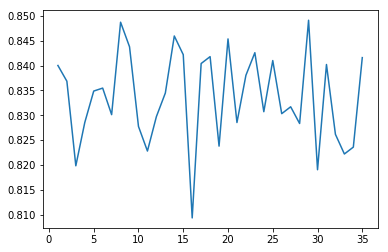

In [63]:
# x_train = train_df
# y_train = label

accuracy = []
x = []
for i in range(1,x_train.shape[1]):
    clf = RandomForestClassifier(n_estimators=30,max_features=None)
    x.append(i)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))
plt.plot(x,accuracy)
plt.show()

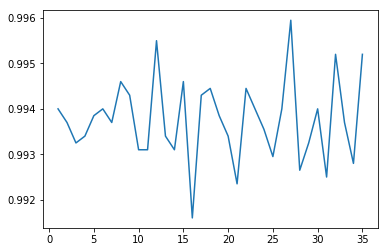

In [54]:
# clf_gini = DecisionTreeClassifier(criterion = "gini")
# neigh = KNeighborsClassifier(n_neighbors=8)
x_train = train_df
y_train = label

accuracy = []
x = []
for i in range(1,x_train.shape[1]):
    clf = RandomForestClassifier(n_estimators=20,max_features=None)
    x.append(i)
    clf.fit(x_train,y_train)
    clf.predict(x_test)
    accuracy_score
    accuracy.append(clf.score(x_train,y_train))
plt.plot(x,accuracy)
plt.show()

In [55]:
clf = RandomForestClassifier(random_state=0,n_estimators=20,max_features=None)
# clf = LinearSVC()
clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
x_test = test_df.drop(['Business_Sourced'],axis=1)
y_test = test_df['Business_Sourced']

In [57]:
# pred = rfe.predict(x_test)
pred = clf.predict(x_test)

In [58]:
# rfe.score(x_train,y_train)
clf.score(x_train,y_train)

0.993251349730054

In [59]:
# rfe.estimator_.tree_

In [60]:
d = {'ID': test_ID, 'Business_Sourced': pred}
final = pd.DataFrame(data=d)
final = final[['ID','Business_Sourced']]

In [61]:
final.to_csv('sample_submission.csv',index=False)